In [1]:
import sys,time
sys.path.append('../../')
from smodels.experiment.defaultFinalStates import finalStates
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV, TeV, pb
from smodels.experiment.txnameObj import TxName, TxNameData
from smodels.experiment.infoObj import Info
import numpy as np
import unum

In [2]:
filePath = '../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/TChiChipmSlepL.txt'
globalInfo = Info('../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/globalInfo.txt')
infoObj = Info('../database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/dataInfo.txt')
databaseParticles = finalStates
tx = TxName(filePath,globalInfo,infoObj,databaseParticles)

In [3]:
print(tx.constraint)
print(tx.condition)

2.*([[['L'],['L']],[['L'],['nu']]] + [[['L'],['L']],[['nu'],['L']]])
["Csim([[['L'],['L']],[['L'],['nu']]],[[['L'],['L']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['ta'],['ta']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['ta'],['ta']],[['L'],['nu']]])", "Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['L'],['L']],[['nu'],['ta']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['L'],['L']],[['ta'],['nu']]])", "Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['e'],['e']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['e'],['e']],[['L'],['nu']]])", " Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['L'],['L']],[['nu'],['e']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['L'],['L']],[['e'],['nu']]])"]


In [4]:
print(tx._constraintFunc)
print(len(tx._conditionsList))
print(tx._conditionsList)

2.*(sms_1+sms_2)
9
[{'Csim(sms_1,sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > L,MET), (anyBSM(4) > nu,MET): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > L,MET), (anyBSM(4) > L,MET): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > L,MET), (anyBSM(4) > L,MET): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),ta), (anyBSM(2) > anyBSM(4),nu), (anyBSM(3) > ta,MET), (anyBSM(4) > L,MET): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > L,MET), (anyBSM(4) > nu,MET): 'sms_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),ta), (anyBSM(2) > anyBSM(4),L), (anyBSM(3) > ta,MET), (anyBSM(4) > nu,MET): 'sms_2'}}, {'Cgtr(sms_1,3.*sms_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),L), (anyBSM(2)

In [5]:
slhafile = '../../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


In [6]:
expSMS = ExpSMS.from_string('(PV > C1+(1),N2(2)), (C1+(1) > nu,se_L(3)), (N2(2) > e+,sne_L(4)), (se_L(3) > e-,N1), (sne_L(4) > e-,N1)',
             model=model)
# Hack to create a theory element from a string:
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

expSMS = ExpSMS.from_string('(PV > C1+(1),N2(2)), (C1+(1) > e+,sne_L(3)), (N2(2) > e+,sne_L(4)), (sne_L(3) > nue,N1), (sne_L(4) > e-,N1)',
             model=model)
# Hack to create a theory element from a string:
treeB = TheorySMS()
treeB.add_nodes_from(expSMS.nodes)
treeB.add_edges_from(expSMS.edgeIndices)
treeB.prodXSec = 1.0*fb
treeB.maxWeight = 1.0*fb
treeB.setGlobalProperties()

sms_1


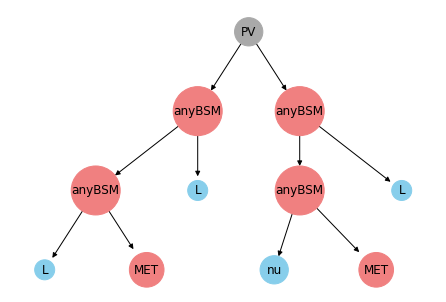

sms_2


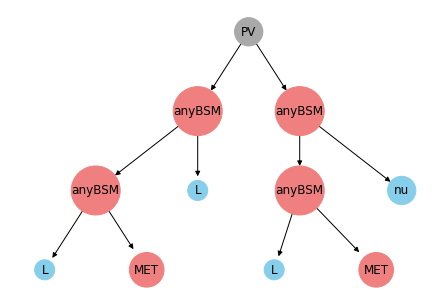

In [7]:
for k,v in tx.smsMap.items():
    print(v)
    k.draw()
    

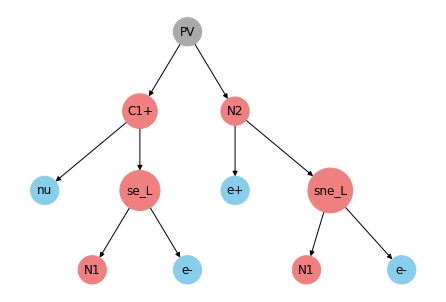

[(0, PV), (1, C1+), (2, N2), (3, nu), (4, se_L), (5, e+), (6, sne_L), (7, N1), (8, e-), (9, N1), (10, e-)]


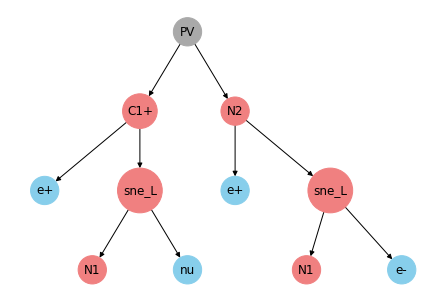

[(0, PV), (1, C1+), (2, N2), (3, e+), (4, sne_L), (5, e+), (6, sne_L), (7, N1), (8, nu), (9, N1), (10, e-)]


In [8]:
treeA.draw()
print(list(zip(treeA.nodeIndices,treeA.nodes)))
treeB.draw()
print(list(zip(treeB.nodeIndices,treeB.nodes)))


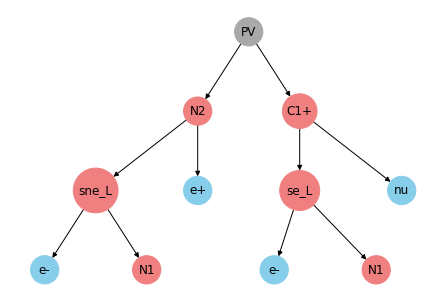

sms_2
[(0, PV), (1, N2), (2, sne_L), (3, C1+), (4, se_L), (5, e+), (6, e-), (7, N1), (8, nu), (9, e-), (10, N1)]


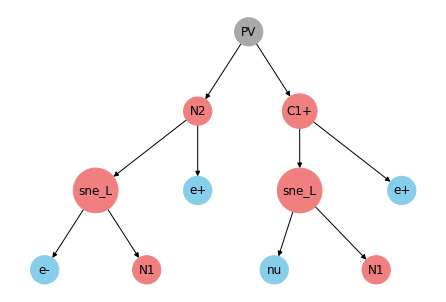

sms_1
[(0, PV), (1, N2), (2, sne_L), (3, C1+), (4, sne_L), (5, e+), (6, e-), (7, N1), (8, e+), (9, nu), (10, N1)]


In [9]:
elMatchA = tx.hasSMSas(treeA)
elMatchB = tx.hasSMSas(treeB)
elMatchA.weight = 100*fb
elMatchB.weight = 5*pb
elMatchA.draw()
print(elMatchA.txlabel)
print(list(zip(elMatchA.nodeIndices,elMatchA.nodes)))
elMatchB.draw()
print(elMatchB.txlabel)
print(list(zip(elMatchB.nodeIndices,elMatchB.nodes)))

In [10]:
els = [elMatchA,elMatchB]

In [11]:
print(tx.evalConstraintFor(els))
print(tx.evalConstraintFor(els) == 2*(elMatchA.weight+elMatchB.weight))

1.02E+01 [pb]
True


In [12]:
print(tx.evalConditionsFor(els))

[0.9607843137254902, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5]
